In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    if b == 0 and c == 0:
        return 0
    elif b == 0:
        return 1000000000
    else:
        return (b-c)**2/(b+c)

def SHD(cc, n):
    T = TDT(n)
    
    d = np.zeros(2)
    N = np.zeros(6)
    
    for k in range(6):
        N[k] = n[k]
    
    if T < cc:
        while T < cc:
            if N[4] > 0:
                N[4] -= 1
            elif N[1] > 0:
                N[1] -= 1
            elif N[2] > 0:
                N[2] -= 1
            elif N[5] > 0:
                N[5] -= 1
            else:
                N[0] -= 1
            N[3] += 1
            
            T = TDT(N)
            d[0] -= 1
        
        T = TDT(n)
        for k in range(6):
            N[k] = n[k]
        
        while T < cc:
            if N[3] > 0:
                N[3] -= 1
            elif N[0] > 0:
                N[0] -= 1
            elif N[2] > 0:
                N[2] -= 1
            elif N[5] > 0:
                N[5] -= 1
            else:
                N[1] -= 1
            N[4] += 1
            
            T = TDT(N)
            d[1] -= 1
        
        if d[0] > d[1]:
            return d[0]
        else:
            return d[1]
    
    else:
        step = 0
        
        if n[0] + 2*n[3] > n[1] + 2*n[4]:
            while T >= cc:
                if n[3] > 0:
                    n[3] -= 1
                elif n[0] > 0:
                    n[0] -= 1
                elif n[5] > 0:
                    n[5] -= 1
                elif n[2] > 0:
                    n[2] -= 1
                else:
                    n[1] -= 1
                n[4] += 1
            
                T = TDT(n)
                step += 1
        else:
            while T >= cc:
                if n[4] > 0:
                    n[4] -= 1
                elif n[1] > 0:
                    n[1] -= 1
                elif n[5] > 0:
                    n[5] -= 1
                elif n[2] > 0:
                    n[2] -= 1
                else:
                    n[0] -= 1
                n[3] += 1
            
                T = TDT(n)
                step += 1
        
        return step-1

In [3]:
def appx_SHD(cc,n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    T = TDT(n)
    
    s = b + c
    d = math.fabs(b-c)
    
    if T >= cc:
        return math.ceil((d-math.sqrt(s*cc)) / 4) - 1
    
    else:
        if b + c < cc:
            return -math.ceil((2*cc - s - d)/4)
        else:
            return -math.ceil((math.sqrt(s*cc)-d)/4)

In [4]:
def random_num(pd):
    dist = np.cumsum(pd).tolist()
    dist[-1] = 1.0
    num = np.random.rand()
    dist.append(num)
    return sorted(dist).index(num)

def exp_mec(shd, m, K, epsilon):
    S = np.zeros(K)
    k = 0
    
    w = np.zeros(m)
    p = np.zeros(m)
    
    while k < K:
        sumw = 0
        for i in range(m):
            w[i] = math.exp(epsilon * shd[i] / (2*K))
            sumw += w[i]
        for i in range(m):
            p[i] = w[i]/sumw
            
        x = random_num(p)
        shd[x] = -1000000.0
        S[k] = x
        k += 1
    
    return S

In [5]:
# b, cを与える (n0=b, n1=cとする, n5 = 2N-b-c)

def generate_n_small(N, M):
    S = np.zeros(M)
    n = np.zeros((M,6))
    
    for i in range(M-10):
        S[i] = random.randint(0,2*N)
        n[i][0] = np.random.binomial(S[i],0.5)
        n[i][1] = S[i] - n[i][0]
        n[i][5] = 2*N - n[i][0] - n[i][1]
        
    
    for i in range(M-10,M):
        S[i] = random.randint(0,2*N)
        n[i][0] = np.random.binomial(S[i],0.75)
        n[i][1] = S[i] - n[i][0]
        n[i][5] = 2*N - n[i][0] - n[i][1]
    
    return n

def generate_n_large(N, M):
    S = np.zeros(M)
    n = np.zeros((M,6))
    
    for i in range(M-10):
        S[i] = random.randint(0,2*N)
        n[i][0] = np.random.binomial(S[i],0.5)
        n[i][1] = S[i] - n[i][0]
        n[i][5] = 2*N - n[i][0] - n[i][1]
        
    
    for i in range(M-10,M):
        S[i] = random.randint(0,2*N)
        n[i][0] = np.random.binomial(S[i],0.55)
        n[i][1] = S[i] - n[i][0]
        n[i][5] = 2*N - n[i][0] - n[i][1]
    
    return n

In [6]:
#精度評価

def evaluation(K, N, M):
    accuracy = np.zeros((7,2))
    
    S = np.zeros(M)
    b = np.zeros(M)
    c = np.zeros(M)

    n = np.zeros((M,6))
    
    correct = np.zeros((7,2))
    
    for j in range(50):
        if N == 150:
            n = generate_n_small(N,M)
        else:
            n = generate_n_large(N,M)
        
        for i in range(M):
            b[i] = n[i][0] + n[i][2] + 2*n[i][3]
            c[i] = n[i][1] + n[i][2] + 2*n[i][4]
        
        stats = np.zeros(M)
        
        appx_shd = np.zeros(M)
        shd = np.zeros(M)
        
        true = np.zeros(K)
        
        for i in range(M):
            if b[i] == 0 and c[i] == 0:
                stats[i] = 0
            else:
                stats[i] = (b[i]-c[i])**2/(b[i]+c[i])
        
        x = np.argsort(stats)
        #for i in range(10):
            #print(x[M-1-i])
        
        for i in range(K):
            true[i] = x[M-1-i]
        
        if N == 150:
            cc = 19.5
        else:
            cc = 29.7
        
        for i in range(M):
            k = [int(n[i][0]), int(n[i][1]), int(n[i][2]), int(n[i][3]), int(n[i][4]), int(n[i][5])]
            appx_shd[i] = appx_SHD(cc,k)
            shd[i] = SHD(cc,k)
        
        #print(shd)
        #print(appx_shd)
        
        #print(true)
        
        APPX = np.zeros((7,M))
        EXACT = np.zeros((7,M))
        
        for i in range(7):
            APPX[i] = appx_shd
            EXACT[i] = shd
        
        for i in range(7):
            if i == 0:
                appx_result = exp_mec(APPX[i],M,K,0.1)
                exact_result = exp_mec(EXACT[i],M,K,0.1)
                for k in range(K):
                    for l in range(K):
                        if appx_result[k] == true[l]:
                            correct[i][0] += 1
                        if exact_result[k] == true[l]:
                            correct[i][1] += 1
            else:
                appx_result = exp_mec(APPX[i],M,K,0.5*i)
                exact_result = exp_mec(EXACT[i],M,K,0.5*i)
                for k in range(K):
                    for l in range(K):
                        if appx_result[k] == true[l]:
                            correct[i][0] += 1
                        if exact_result[k] == true[l]:
                            correct[i][1] += 1
            #print(appx_result)
            #print(exact_result)
        
    accuracy = correct/(K*50)    
    return accuracy

[[0.    0.   ]
 [0.    0.   ]
 [0.01  0.046]
 [0.096 0.218]
 [0.208 0.35 ]
 [0.326 0.41 ]
 [0.388 0.452]]
[[0.    0.   ]
 [0.    0.   ]
 [0.008 0.068]
 [0.112 0.258]
 [0.254 0.388]
 [0.344 0.442]
 [0.416 0.478]]
[[0.    0.   ]
 [0.    0.002]
 [0.022 0.086]
 [0.126 0.248]
 [0.258 0.364]
 [0.344 0.432]
 [0.398 0.476]]
[[0.    0.   ]
 [0.    0.002]
 [0.004 0.068]
 [0.104 0.242]
 [0.226 0.37 ]
 [0.336 0.43 ]
 [0.406 0.492]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[0.    0.   ]
 [0.002 0.004]
 [0.006 0.064]
 [0.102 0.252]
 [0.25  0.38 ]
 [0.346 0.456]
 [0.43  0.508]]
[[0.000e+00 0.000e+00]
 [4.000e-04 1.600e-03]
 [1.000e-02 6.640e-02]
 [1.080e-01 2.436e-01]
 [2.392e-01 3.704e-01]
 [3.392e-01 4.340e-01]
 [4.076e-01 4.812e-01]]


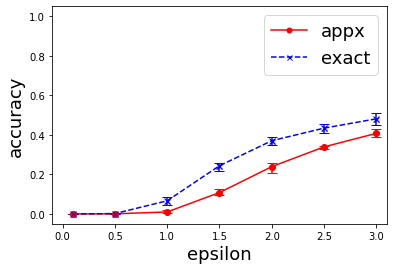

In [7]:
#n=5000, M=1000000のときの精度評価
#K=10

accuracy = np.zeros((7,2))
max_acc = np.zeros((7,2))
min_acc = np.ones((7,2))

sum_acc = np.zeros((7,2))

epsilon = np.zeros(7)
y_err = np.zeros((2,7,2))

for j in range(5):
    accuracy = evaluation(10,5000,1000000)
    for i in range(7):
        if i == 0:
            epsilon[i] = 0.1
        else:
            epsilon[i] = 0.5*i
        if accuracy[i][0] > max_acc[i][0]:
            max_acc[i][0] = accuracy[i][0]
        if accuracy[i][0] < min_acc[i][0]:
            min_acc[i][0] = accuracy[i][0]
        if accuracy[i][1] > max_acc[i][1]:
            max_acc[i][1] = accuracy[i][1]
        if accuracy[i][1] < min_acc[i][1]:
            min_acc[i][1] = accuracy[i][1]
        sum_acc[i][0] += accuracy[i][0]
        sum_acc[i][1] += accuracy[i][1]
    print(accuracy)

accuracy = sum_acc / 5
y_err[0,:,0] = accuracy[:,0] - min_acc[:,0]
y_err[1,:,0] = max_acc[:,0] - accuracy[:,0]
y_err[0,:,1] = accuracy[:,1] - min_acc[:,1]
y_err[1,:,1] = max_acc[:,1] - accuracy[:,1]

print(accuracy)
#print(y_err)

fig = plt.figure()
plt.ylim(-0.05, 1.05)
plt.xlim(-0.1, 3.1)
plt.errorbar(epsilon, accuracy[:,0], yerr = y_err[:,:,0], capsize=5, fmt='o', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(epsilon, accuracy[:,0], marker="o", markersize=5, color = "red", linestyle = "-", label = "appx")
plt.errorbar(epsilon, accuracy[:,1], yerr = y_err[:,:,1], capsize=5, fmt='x', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(epsilon, accuracy[:,1], marker="x", markersize=5, color = "blue", linestyle = "--", label = "exact")
plt.legend(fontsize = 18)
plt.xlabel("epsilon", fontsize = 18)
plt.ylabel("accuracy", fontsize = 18)
fig.savefig("evaluation1_large_K=10.png")
fig.savefig("fig/evaluation1_large_K=10.eps")